#Feature Engineering
##What is Feature Engineering?
Feature engineering is the process of transforming raw data into meaningful features that can improve the performance of machine learning models. It involves creating, modifying, or selecting features to make the data more suitable for the model to understand patterns and make predictions.
##Why do we neeed feature engineering
Feature engineering is important because it helps improve the performance of machine learning models by transforming raw data into formats or features that are more useful and meaningful for the model. It allows the model to learn better patterns, make more accurate predictions, and handle complex relationships in the data. Without good feature engineering, even powerful models might struggle to perform well.
##What are the steps in feature engineering?
1.Normalization
2.One hot encoding
3.Dimensionality reduction
4.Binning
5.Adding columns



#1.Scaling and Normalization

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


# set seed for reproducibility
np.random.seed(0)

##Scaling
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. Yo**u want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN**. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example.

<ipython-input-13-052bd1045ab4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
<ipython-input-13-052bd1045ab4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

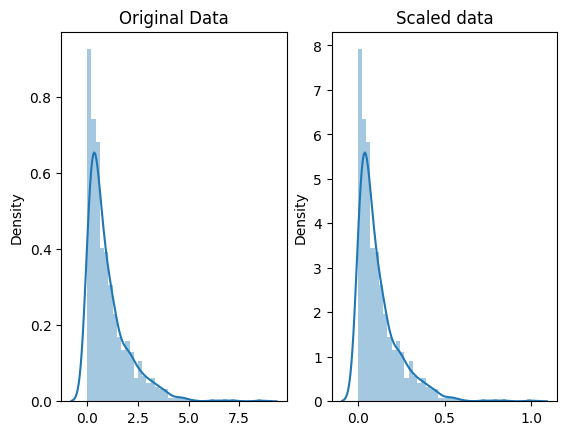

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Notice the shape of the data doesnt change, but instead of randing from 0 to 8, it ranges from 0 to 1.

##Normalization
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

**In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)**

The method were using to normalize here is called the Box-Cox Transformation.

<ipython-input-14-97840d41628b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
<ipython-input-14-97840d41628b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

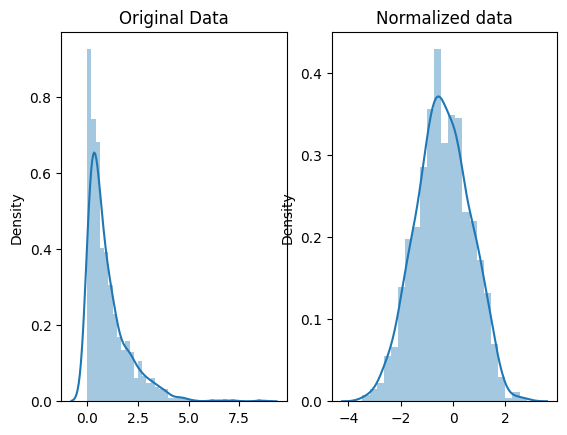

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve")

Key Difference:

**Scaling**: Ensures features don’t dominate just because of their larger numbers.

**Normalization**: Fits data into a defined range when proportions or boundaries are important.